In [1]:
#parameters to create an animated figure
import json
import os
import method as me
import pandas as pd
import plotly
import plotly.express as px
import ast
import matplotlib.pyplot as plt
import tensorflow as tf

datasets = "nmnist"
number_of_classes = "2"
number_of_training_samples = "5000"
techniques = ["PCA", "UMAP", "TSVD"]
proportions = [[1, 0, 0], [0.9, 0.1, 0], [0.8, 0.2, 0], [0.7, 0.3, 0], [0.6, 0.4, 0], [0.5, 0.5, 0], [0.4, 0.6, 0], [0.3, 0.7, 0], [0.2, 0.8, 0], [0.1, 0.9, 0],
                [0, 1, 0], [0, 0.9, 0.1], [0, 0.8, 0.2], [0, 0.7, 0.3], [0, 0.6, 0.4], [0, 0.5, 0.5], [0, 0.4, 0.6], [0, 0.3, 0.7], [0, 0.2, 0.8], [0, 0.1, 0.9],
                [0, 0, 1], [0.1, 0, 0.9], [0.2, 0, 0.8], [0.3, 0, 0.7], [0.4, 0, 0.6], [0.5, 0, 0.5], [0.6, 0, 0.4], [0.7, 0, 0.3], [0.8, 0, 0.2], [0.9, 0, 0.1]]

In [13]:
data = {'x': [1, 2, 3, 4, 5], 'y': [2, 4, 8, 16, 32]}
pd.DataFrame(data)

fig = px.scatter(data, x='x', y='y', width=500, height=400, title="Example visualization of 2 dimensional data")
fig.update_layout(
    font_family="Times New Roman",
    title={
        'y':0.85,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}
)
plotly.io.write_image(fig, ('results/plots/example.png'), scale=2)
fig.show()

In [ ]:
#performing our method on these parameters
for pr in proportions:
    filename = "config.json"
    with open(filename) as jsonFile:
            jsonObject = json.load(jsonFile)
            jsonObject['DATASET'] = datasets
            jsonObject['DRS'] = techniques
            jsonObject['PROPORTIONS'] = pr
            jsonObject['NUMBER_OF_TSAMPLES'] = number_of_training_samples
            jsonObject['NUMBER_OF_CLASSES'] = number_of_classes

    os.remove(filename)
    with open(filename, 'w') as f:
        json.dump(jsonObject, f, indent=2)

    me.method()

In [23]:
#retrieving the projections created by the method
n_2 = []
for pr in proportions:
    drs_name = ''.join(techniques).lower()
    #print(data, classes, drs_name, pr, sample)

    steerable = pd.read_csv(('results/projections/{b}{e}_{w}{v}_{f}_{g}.csv').format(b=datasets[0:3],e=number_of_classes, w=drs_name, v=pr, f=number_of_training_samples, g=1000))
    steerable['label'] = steerable['label'].astype(int)
    with open(('results/scores/{b}{e}_{w}{v}_{f}_{g}.json').format(b=datasets[0:3],e=number_of_classes, w=drs_name, v=pr, f=number_of_training_samples, g=1000)) as jsonFile:
        results = json.load(jsonFile)
        jsonFile.close()

    drs = results['dimensionality_reduction_methods']
    pro = results['proportions']
    training_samples = str(results['number_of_Tsamples'])
    loss = float(results['loss'])
    trustworthiness = float(results['trustworthiness'])
    continuity = float(results['continuity'])
    neighborhood_hit = float(results['neighborhood_hit'])

    n_2.append([steerable, drs, pro, training_samples, loss, trustworthiness, continuity, neighborhood_hit])

print(len(n_2))

30


In [24]:
#creating images for our animation

i = 1
for proj in n_2:

    drs = ast.literal_eval(proj[1])
    pro = ast.literal_eval(proj[2])

    title_list = []
    for t, u in zip(drs, pro):
        title_list.append("{u}".format(u=(str(float(u)) + " " + str(t))))

    title_list = ' '.join(title_list)

    df = proj[0]
    df['label'] = df['label'].astype(str)
    
    fig = px.scatter(proj[0], x='PC1', y='PC2', color='label')
    fig.update_layout(height=500, width=500, title_text='{w}'.format(w=title_list), template='simple_white', title_x=0.5, showlegend=False)
    fig.update_xaxes(visible=False) 
    fig.update_yaxes(visible=False)
    fig.update_traces(marker=dict(size=1.7))
    plotly.io.write_image(fig, ('results/animation/{w}.png'.format(w=i)), scale=2)
    i+=1

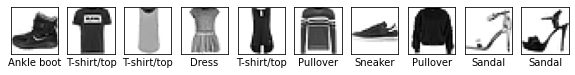

In [60]:
#show images from dataset

dataset = "f"
amount = 10

if dataset == "n":
    da = "MNIST"
    mnist = tf.keras.datasets.mnist

    (train_images, train_labels), (test_images, test_labels) = mnist.load_data()

    class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

    train_images = train_images / 255.0

    test_images = test_images / 255.0

    fig = plt.figure(figsize=(10,2))
    for i in range(amount):
        plt.subplot(int(amount/5), amount,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[train_labels[i]])
    fig.set_facecolor('white')
    plt.savefig('results/plots/{w} images.jpg'.format(w=da), bbox_inches='tight', pad_inches=0.1)    
    plt.show()

if dataset == "f":
    da = "Fashion MNIST"
    fashion_mnist = tf.keras.datasets.fashion_mnist

    (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

    train_images = train_images / 255.0

    test_images = test_images / 255.0

    fig = plt.figure(figsize=(10,2))
    for i in range(amount):
        plt.subplot(int(amount/5), amount,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[train_labels[i]])
    fig.set_facecolor('white')
    plt.savefig('results/plots/{w} images.jpg'.format(w=da), bbox_inches='tight', pad_inches=0.1)
    plt.show()